# MLiP - Bengali.AI - Group Sanne de Kleijn

## Libraries

As a first step we need to import some libraries

In [23]:
# We use tensorflow's version of Keras
import os
import pandas as pd
import numpy as np
import PIL.Image
import time
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline 

## Loading the dataset
For this notebook we use the Bengali.AI handwritten Grapheme data set from Kaggle \[1\].

In [24]:
# Check the data
for dirname, _, filenames in os.walk('Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the train data
DATA_FOLDER = 'Data/'
train_df = pd.read_csv(os.path.join(DATA_FOLDER, 'train.csv'))
train_df.head()

print('train_df shape: ', train_df.shape)

# Load the test data
test_df = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv'))
test_df.head()

print('test_df shape: ', test_df.shape)

# Load class map
class_map_df = pd.read_csv(os.path.join(DATA_FOLDER, 'class_map.csv'))
class_map_df.head()

print('class_map_df shape: ', class_map_df.shape)

# Load sample submissions
sample_submission_df = pd.read_csv(os.path.join(DATA_FOLDER, 'sample_submission.csv'))
sample_submission_df.head()

print('sample_submission_df shape: ', sample_submission_df.shape)



Data\class_map.csv
Data\sample_submission.csv
Data\test.csv
Data\test_image_data_0.parquet
Data\test_image_data_1.parquet
Data\test_image_data_2.parquet
Data\test_image_data_3.parquet
Data\train.csv
Data\train_image_data_0.parquet
Data\train_image_data_1.parquet
Data\train_image_data_2.parquet
Data\train_image_data_3.parquet
train_df shape:  (200840, 5)
test_df shape:  (36, 3)
class_map_df shape:  (186, 3)
sample_submission_df shape:  (36, 2)


## Read parquet files

### Read train files

We start with only two files \[1\].

In [25]:
# Read first file
start_time = time.time()
train_0_df = pd.read_parquet(os.path.join(DATA_FOLDER,'train_image_data_0.parquet'))
print(f"`train_image_data_0` read in {round(time.time()-start_time,2)} sec.") 

print('train_0_df shape: ', train_0_df.shape)

print(train_0_df.head())


`train_image_data_0` read in 200.21 sec.
train_0_df shape:  (50210, 32333)
  image_id    0    1    2    3    4    5    6    7    8  ...    32322  32323  \
0  Train_0  254  253  252  253  251  252  253  251  251  ...      253    253   
1  Train_1  251  244  238  245  248  246  246  247  251  ...      255    255   
2  Train_2  251  250  249  250  249  245  247  252  252  ...      254    253   
3  Train_3  247  247  249  253  253  252  251  251  250  ...      254    254   
4  Train_4  249  248  246  246  248  244  242  242  229  ...      255    255   

   32324  32325  32326  32327  32328  32329  32330  32331  
0    253    253    253    253    253    253    253    251  
1    255    255    255    255    255    255    255    254  
2    252    252    253    253    253    253    251    249  
3    254    254    254    253    253    252    251    252  
4    255    255    255    255    255    255    255    255  

[5 rows x 32333 columns]


In [26]:
# Read second file
#start_time = time.time()
#train_1_df = pd.read_parquet(os.path.join(DATA_FOLDER,'train_image_data_1.parquet'))
#print(f"`train_image_data_1` read in {round(time.time()-start_time,2)} sec.")  

#print('train_0_df shape: ', train_0_df.shape)

#print(train_0_df.head())

### Read test files

We start with only one test file \[1\].

In [27]:
# Read first test file
start_time = time.time()
test_0_df = pd.read_parquet(os.path.join(DATA_FOLDER,'test_image_data_0.parquet'))
print(f"`test_image_data_0` read in {round(time.time()-start_time,2)} sec.")  

print('train_0_df shape: ', train_0_df.shape)

print(train_0_df.head())

`test_image_data_0` read in 40.56 sec.
train_0_df shape:  (50210, 32333)
  image_id    0    1    2    3    4    5    6    7    8  ...    32322  32323  \
0  Train_0  254  253  252  253  251  252  253  251  251  ...      253    253   
1  Train_1  251  244  238  245  248  246  246  247  251  ...      255    255   
2  Train_2  251  250  249  250  249  245  247  252  252  ...      254    253   
3  Train_3  247  247  249  253  253  252  251  251  250  ...      254    254   
4  Train_4  249  248  246  246  248  244  242  242  229  ...      255    255   

   32324  32325  32326  32327  32328  32329  32330  32331  
0    253    253    253    253    253    253    253    251  
1    255    255    255    255    255    255    255    254  
2    252    252    253    253    253    253    251    249  
3    254    254    254    253    253    252    251    252  
4    255    255    255    255    255    255    255    255  

[5 rows x 32333 columns]


### Data check

We check whether the distribution of the classes matches the kaggle dataset \[1\].

In [45]:
print(f"Train: unique grapheme roots: {train_df.grapheme_root.nunique()}")
print(f"Train: unique vowel diacritics: {train_df.vowel_diacritic.nunique()}")
print(f"Train: unique consonant diacritics: {train_df.consonant_diacritic.nunique()}")

print(f"Train: total unique elements: {train_df.grapheme_root.nunique() + train_df.vowel_diacritic.nunique() + train_df.consonant_diacritic.nunique()}")
print(f"Class map: unique elements: \n{class_map_df.component_type.value_counts()}")
print(f"Total combinations: {pd.DataFrame(train_df.groupby(['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'])).shape[0]}")

# TODO: asserts? 

Train: unique grapheme roots: 168
Train: unique vowel diacritics: 11
Train: unique consonant diacritics: 7
Train: total unique elements: 186
Class map: unique elements: 
grapheme_root          168
vowel_diacritic         11
consonant_diacritic      7
Name: component_type, dtype: int64


ValueError: DataFrame constructor not properly called!

## Inspect grapheme images

We define a function to show a sample of size * size (ex: 5 x 5 = 25) handwritten graphemes \[1\].

In [37]:
def display_image_from_data(data_df, size=5):
    '''
    Display grapheme images from sample data
    param: data_df - sample of data
    param: size - sqrt(sample size of data)
    '''
    plt.figure()
    fig, ax = plt.subplots(size,size,figsize=(12,12))
    # we show grapheme images for a selection of size x size samples
    for i, index in enumerate(data_df.index):
        image_id = data_df.iloc[i]['image_id']
        flattened_image = data_df.iloc[i].drop('image_id').values.astype(np.uint8)
        unpacked_image = PIL.Image.fromarray(flattened_image.reshape(137, 236))

        ax[i//size, i%size].imshow(unpacked_image)
        ax[i//size, i%size].set_title(image_id)
        ax[i//size, i%size].axis('on')

<Figure size 432x288 with 0 Axes>

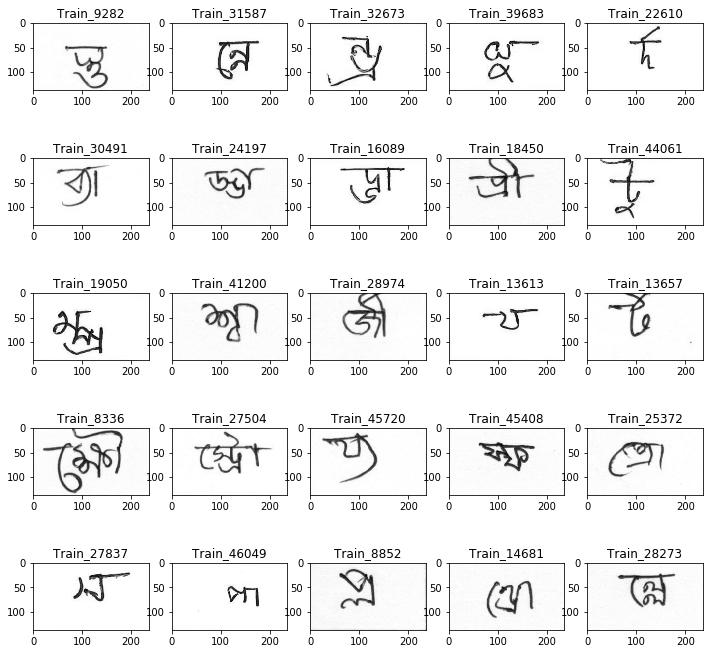

In [38]:
display_image_from_data(train_0_df.sample(25))

We define another function to show the same grapheme in different writing, i.e. to perform sampling (based on variation of grapheme root, vowel diacritic and consonant diacritic, as parameters to the function) \[1\].

In [43]:
def display_writing_variety(data_df=train_0_df, grapheme_root=72, vowel_diacritic=0,\
                             consonant_diacritic=0, size=5):
    '''
    This function get a set of grapheme root, vowel diacritic and consonant diacritic
    and display a sample of 25 images for this grapheme
    param: data_df - the dataset used as source of data
    param: grapheme_root - the grapheme root label
    param: vowel_diacritic - the vowel diacritic label
    param: consonant_diacritic - the consonant diacritic label 
    param: size - sqrt(number of images to show)
    '''
    sample_train_df = train_df.loc[(train_df.grapheme_root == grapheme_root) & \
                                  (train_df.vowel_diacritic == vowel_diacritic) & \
                                  (train_df.consonant_diacritic == consonant_diacritic)]
    print(f"total: {sample_train_df.shape}")
    sample_df = data_df.merge(sample_train_df.image_id.to_frame(), how='inner')
    print(f"total: {sample_df.shape}")
    gr = sample_train_df.iloc[0]['grapheme']
    cm_gr = class_map_df.loc[(class_map_df.component_type=='grapheme_root')& \
                             (class_map_df.label==grapheme_root), 'component'].values[0]
    cm_vd = class_map_df.loc[(class_map_df.component_type=='vowel_diacritic')& \
                             (class_map_df.label==vowel_diacritic), 'component'].values[0]    
    cm_cd = class_map_df.loc[(class_map_df.component_type=='consonant_diacritic')& \
                             (class_map_df.label==consonant_diacritic), 'component'].values[0]    
    
    print(f"grapheme: {gr}, grapheme root: {cm_gr}, vowel discritic: {cm_vd}, consonant diacritic: {cm_cd}")
    sample_df = sample_df.sample(size * size)
    display_image_from_data(sample_df, size=size)


total: (163, 5)
total: (36, 32333)
grapheme: দাঁ, grapheme root: দ, vowel discritic: া, consonant diacritic: ঁ


<Figure size 432x288 with 0 Axes>

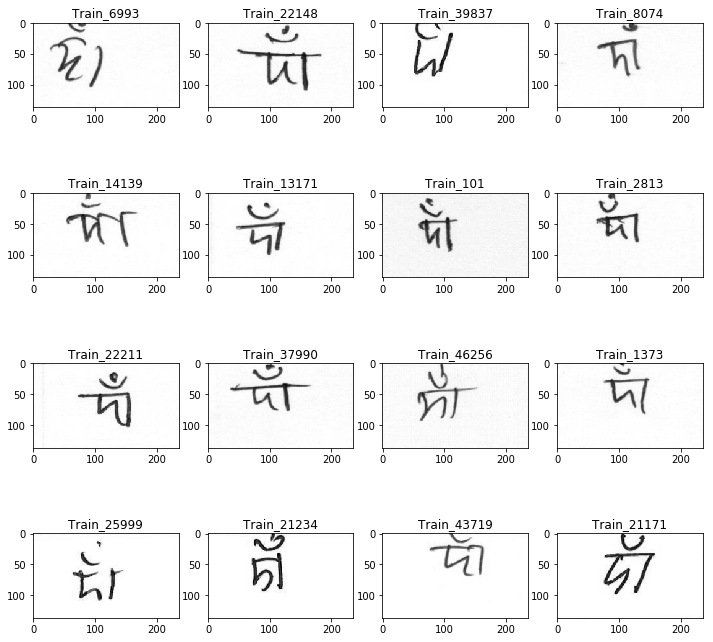

In [44]:
display_writing_variety(train_0_df,72,1,1,4)

## References

\[1\] https://www.kaggle.com/gpreda/bengali-ai-handwritten-grapheme-getting-started Retrieved on: February 18, 2020